# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🏦 Bank 🏦</p>

<img src="https://images.unsplash.com/photo-1501167786227-4cba60f6d58f?q=80&w=2940&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D">



<b>Context</b>

This dataset provides information related to direct marketing campaigns of a banking institution. Each record represents a client and includes the following attributes:

1. **`age`:** Age of the client in years.
2. **`job`:** Type of job (e.g., "admin.", "technician", "services", etc.).
3. **`marital`:** Marital status ("married", "single", "divorced").
4. **`education`:** Level of education ("primary", "secondary", "tertiary", "unknown").
5. **`default`:** Has credit in default? (binary: "yes", "no").
6. **`balance`:** Average yearly balance, in euros.
7. **`housing`:** Has a housing loan? (binary: "yes", "no").
8. **`loan`:** Has a personal loan? (binary: "yes", "no").
9. **`contact`:** Contact communication type ("unknown", "telephone", "cellular").
10. **`day`:** Last contact day of the month.
11. **`month`:** Last contact month of the year ("jan", "feb", ..., "dec").
12. **`duration`:** Last contact duration, in seconds.
13. **`campaign`:** Number of contacts performed during this campaign and for this client.
14. **`pdays`:** Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted).
15. **`previous`:** Number of contacts performed before this campaign and for this client.
16. **`poutcome`:** Outcome of the previous marketing campaign ("unknown", "other", "failure", "success").
17. **`y`:** Has the client subscribed to a term deposit? (binary: "yes", "no").

These features are intended to help analyze the success factors of marketing campaigns, particularly in predicting whether a client will subscribe to a term deposit, thus providing insights for optimizing marketing strategies.

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. Data Overview](#3)

* [4. EDA](#4)
        
* [5. Preprocessing](#5) 

* [6. SPLITING DATA](#6) 

* [7. Scaling](#7) 
   
* [8. MODELS](#8)

<!-- * [9. SUMMRY](#9)
  -->
* [9. END](#10)
    
    

<a id="1"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set style of seaborn plots
sns.set_style('darkgrid')

# Palette
palette = sns.color_palette('plasma')

<a id="2"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [3]:
df = pd.read_csv('/kaggle/input/bank-csv/bank.csv' , delimiter=';')

<a id="3"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧐 Data Overview</p>

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<div class="alert alert-block alert-info ;"> 📌  We do not have any null or missing data 🥳 </div>

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Markdown
<a id="4"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>


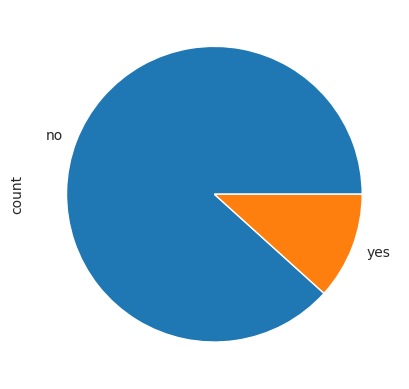

In [9]:
df['y'].value_counts().plot(kind='pie');

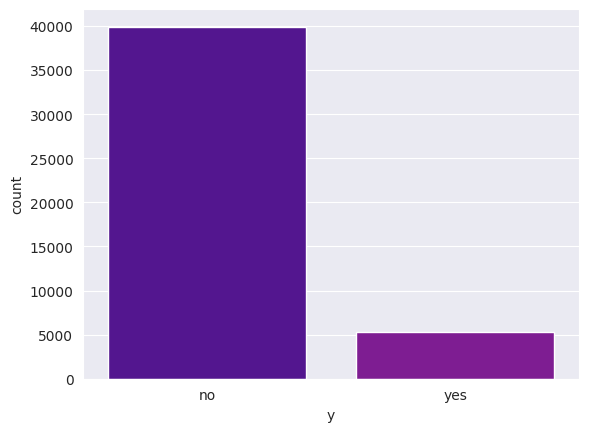

In [10]:
sns.countplot(data = df , x='y' , palette=palette);

### Numericals

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

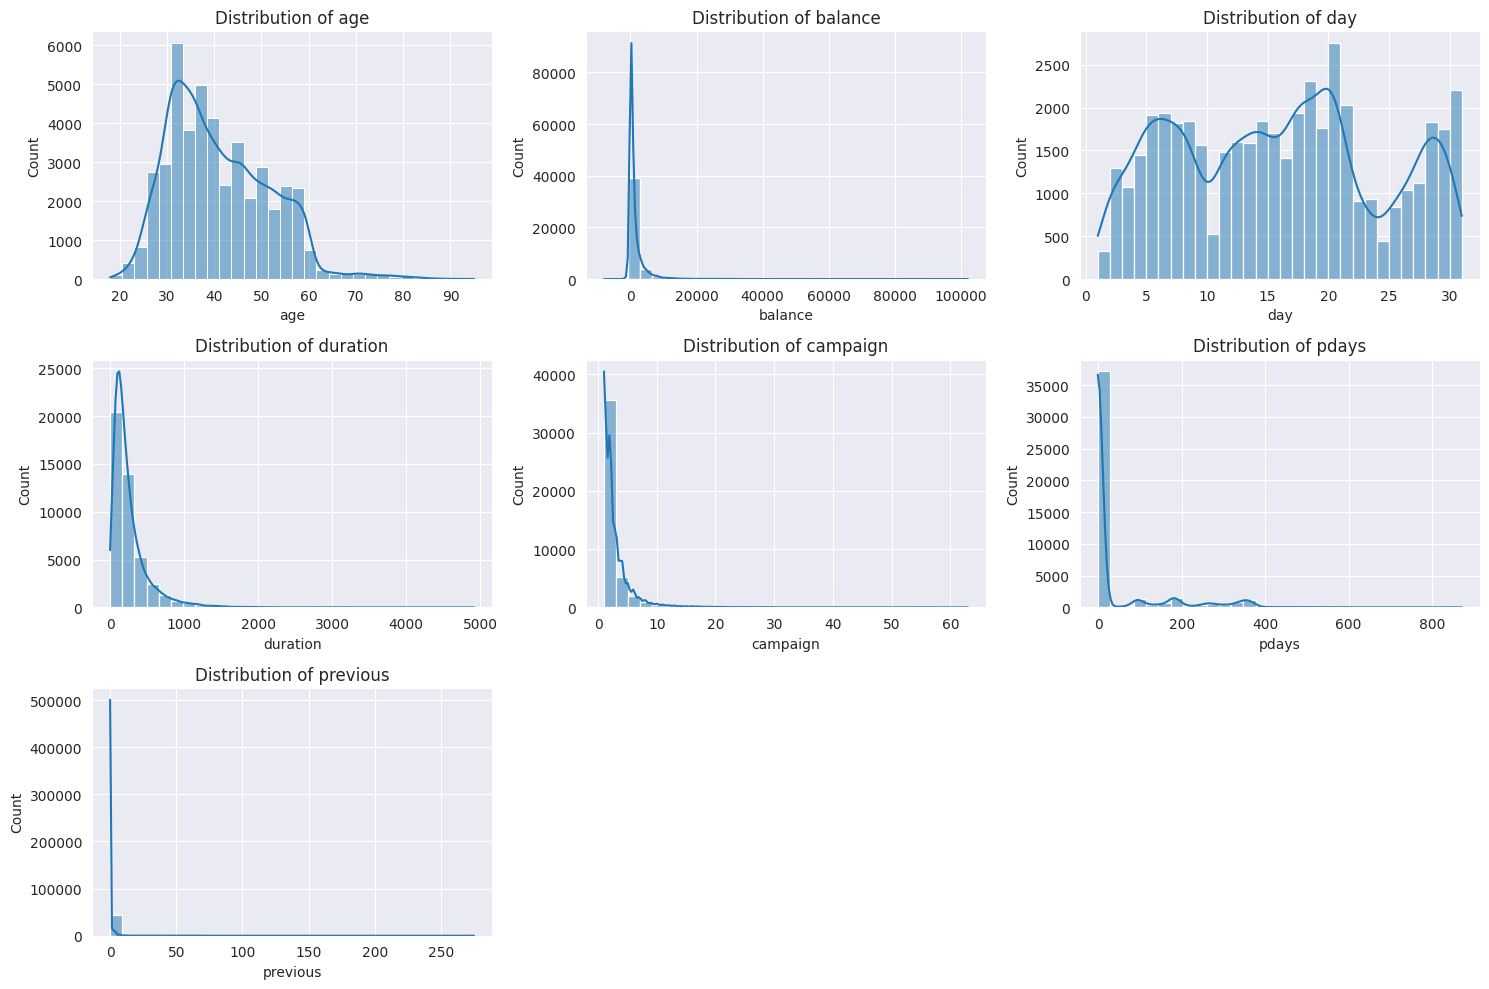

In [11]:
# Histograms for numeric features
plt.figure(figsize=(15, 10))

for index, feature in enumerate(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']):
    plt.subplot(3, 3, index+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

<ul>
<li><strong>Age:</strong> Shows a right-skewed distribution, indicating a larger number of younger clients compared to older ones.</li>
<li><strong>Balance:</strong> This is also right-skewed, with most clients having a balance in the lower range. There are also clients with negative balances.</li>
<li><strong>Day:</strong> Appears to have a somewhat uniform distribution across the month, with slight peaks at the beginning and end of the month.</li>
<li><strong>Duration:</strong> The call duration is right-skewed, with most calls being relatively short and a few calls lasting significantly longer.</li>
<li><strong>Campaign:</strong> Indicates that most clients were contacted a few times during this campaign, with the number of contacts quickly tapering off.</li>
<li><strong>Pdays:</strong> The majority of clients were not previously contacted, as indicated by the peak at -1. The distribution of days that passed by after the client was last contacted is heavily skewed towards 0, indicating that if clients were contacted before, it was mostly in the recent past.</li>
<li><strong>Previous:</strong> Similar to pdays, most clients had not been contacted before this campaign.</li>
</ul>


### Categoricals

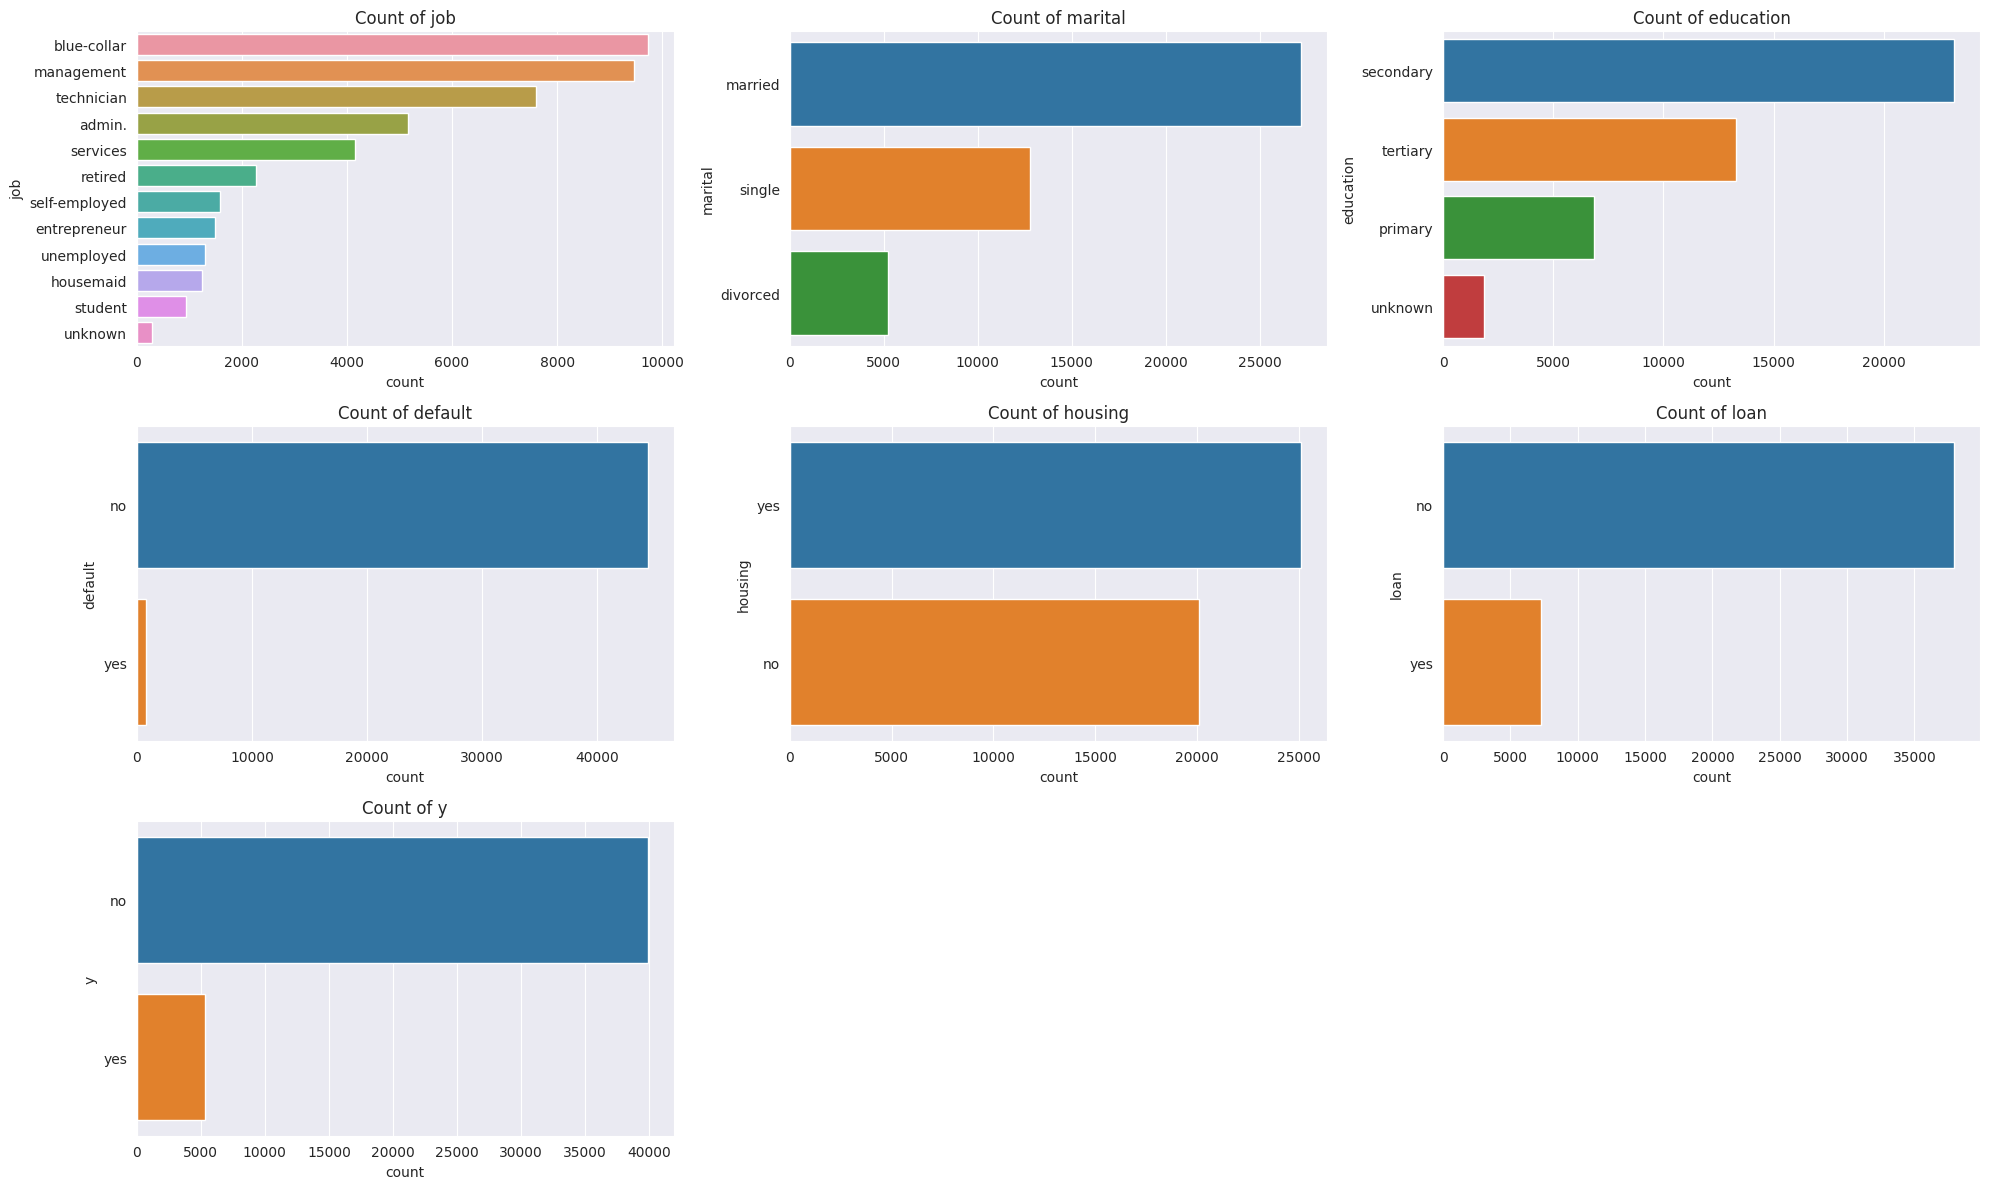

In [12]:
plt.figure(figsize=(20, 12))

# List of categorical features to plot
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

for index, feature in enumerate(categorical_features):
    plt.subplot(3, 3, index+1)
    sns.countplot(y=df[feature], order = df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.tight_layout()

plt.show()

<ul>
<li><strong>Job:</strong> The most common jobs among clients are blue-collar, management, and technician roles. There are also clients with unknown job types.</li>
<li><strong>Marital:</strong> Most clients are married, followed by single and divorced.</li>
<li><strong>Education:</strong> Secondary education is the most common, followed by tertiary, and a significant number of clients have an unknown education level.</li>
<li><strong>Default:</strong> A large majority of clients have no default credit.</li>
<li><strong>Housing:</strong> About half of the clients have housing loans, with a slight majority.</li>
<li><strong>Loan:</strong> Most clients do not have personal loans.</li>
<li><strong>Target Variable (y):</strong> A significant majority of the clients have not subscribed to a term deposit (no).</li>
</ul>


### box plots

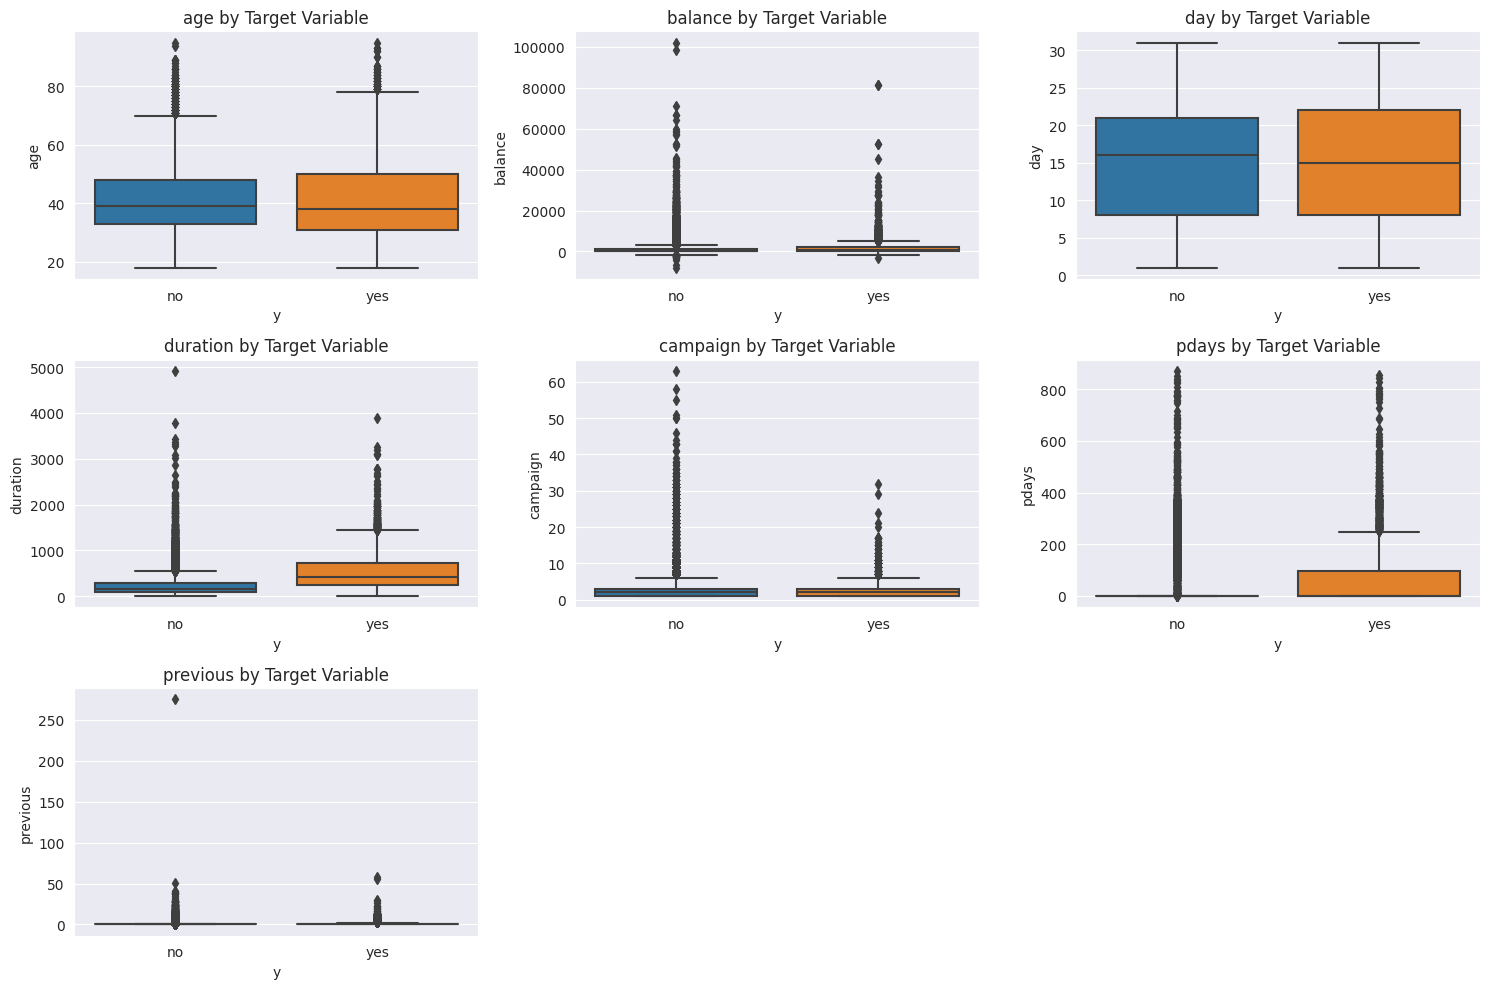

In [13]:
plt.figure(figsize=(15, 10))

# Numeric features
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for index, feature in enumerate(numeric_features):
    plt.subplot(3, 3, index+1)
    sns.boxplot(x='y', y=feature, data=df)
    plt.title(f'{feature} by Target Variable')
    plt.tight_layout()

plt.show()

<ul>
<li><strong>Age:</strong> There seems to be a slight difference in the age distribution, with subscribers tending to be slightly older on average than non-subscribers.</li>
<li><strong>Balance:</strong> Subscribers appear to have a higher median balance compared to non-subscribers, indicating that financial stability might influence the decision to subscribe.</li>
<li><strong>Day:</strong> There doesn't seem to be a significant difference in the distribution of days of the month between subscribers and non-subscribers.</li>
<li><strong>Duration:</strong> There's a notable difference in the last contact duration, with subscribers having had longer calls on average. This suggests that the longer a client is engaged during a call, the more likely they are to subscribe.</li>
<li><strong>Campaign:</strong> The number of contacts during the campaign doesn't show a clear distinction between subscribers and non-subscribers, though the median appears slightly lower for subscribers.</li>
<li><strong>Pdays:</strong> For clients who were previously contacted, those who subscribed seem to have been contacted more recently than those who did not.</li>
<li><strong>Previous:</strong> Clients who subscribed tend to have been contacted more times before the current campaign than those who did not subscribe.</li>
</ul>


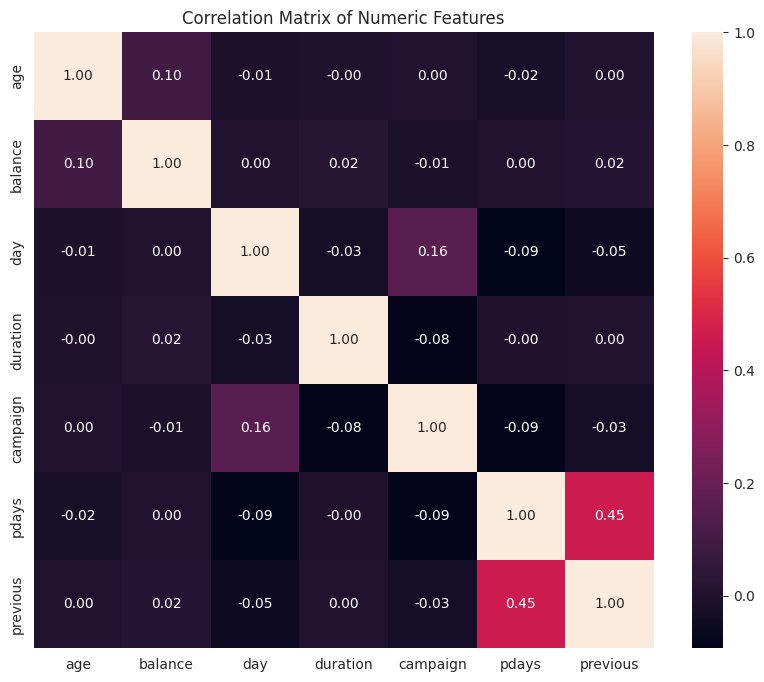

In [14]:
# Creating a heatmap to visualize the correlations between numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

<a id="5"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧹 Preprocessing </p>

# Outliers

In [15]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64

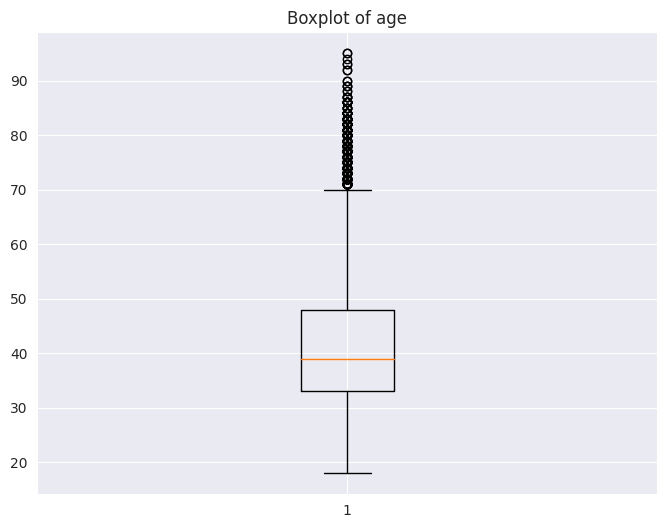

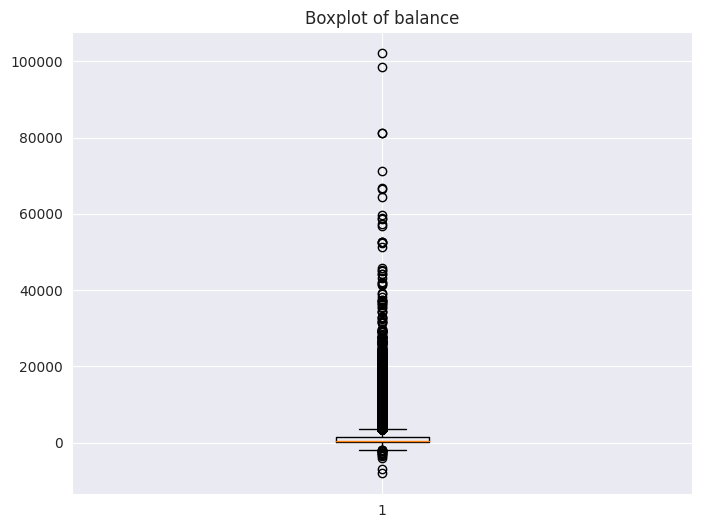

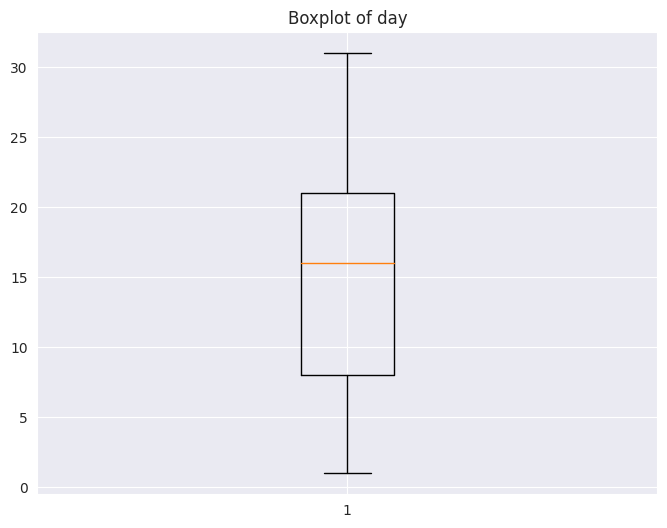

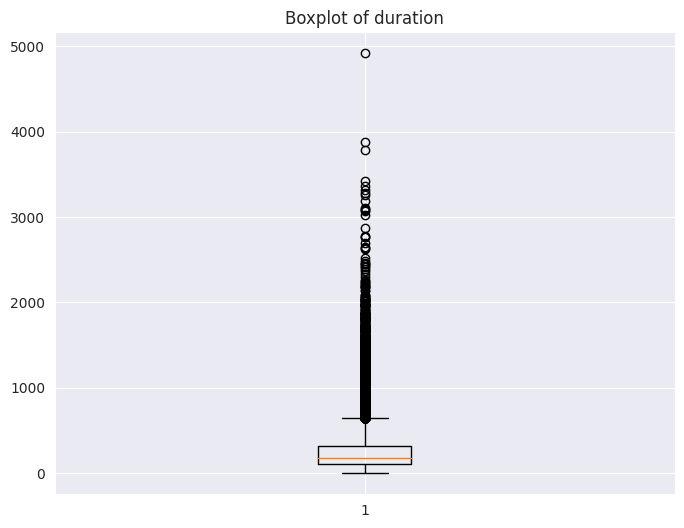

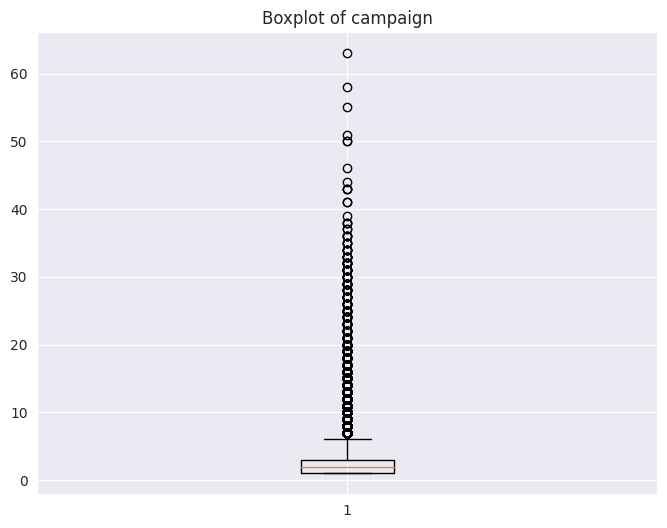

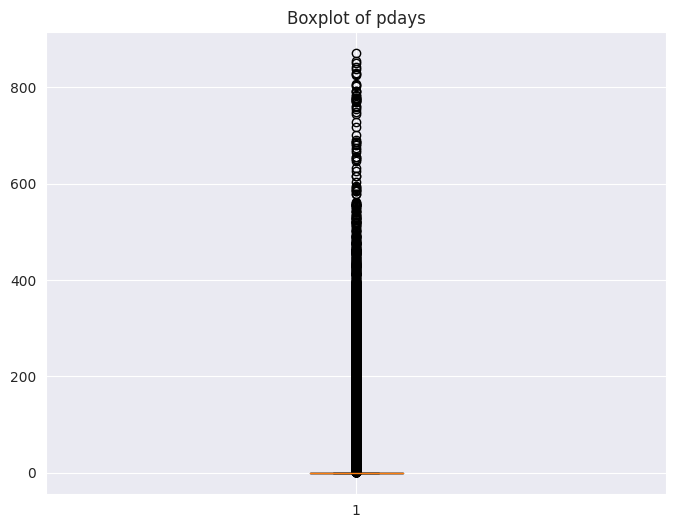

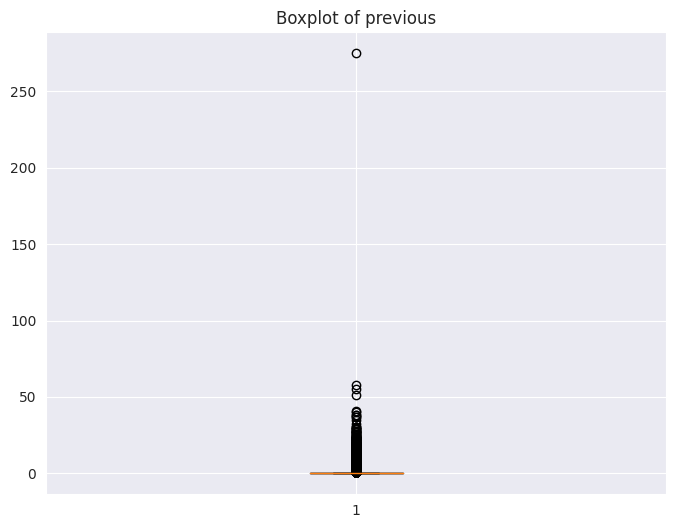

In [16]:

# Detect and visualize outliers using Boxplot
num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [17]:
for feature in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # محاسبه میانه ویژگی
    median = df[feature].median()
    
    # شناسایی ناهنجاری‌ها
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))
    
    # جایگزینی ناهنجاری‌ها با میانه
    df.loc[outliers, feature] = median


In [18]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age            0
balance     3658
day            0
duration    1979
campaign       0
pdays          0
previous       0
dtype: int64

# OHE

In [19]:
from sklearn.preprocessing import OneHotEncoder


# تعیین ستون‌های کتگوریکال
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# ایجاد نمونه‌ای از OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# فیت و تبدیل داده‌های کتگوریکال
encoded_data = encoder.fit_transform(df[categorical_features])

# تبدیل داده‌های encoded به DataFrame و نام‌گذاری مجدد ستون‌ها
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# ادغام داده‌های encoded با دیتاست اصلی (حذف ستون‌های کتگوریکال اصلی و اضافه کردن داده‌های encoded)
df = df.drop(columns=categorical_features).reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

# نمایش چند ردیف اول از دیتاست جدید
df.head()


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,no,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id="6"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [20]:
X = df.drop('y' , axis=1)
y = df['y']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split (X , y , test_size=0.3 , random_state=101)


<a id="7"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📐 Scaling</p>


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id="8"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💡 MODELS</p>


# 1️⃣ DecisionTree 🌲🪵

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [27]:
dt_model.fit(X_train , y_train)

DecisionTreeClassifier()

## 🔎  Predict Dt

In [28]:
y_pred_dt = dt_model.predict(X_test)

## 🧮  Evaluating Dt

In [29]:
from sklearn.metrics import accuracy_score , classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93     11967
         yes       0.49      0.51      0.50      1597

    accuracy                           0.88     13564
   macro avg       0.71      0.72      0.72     13564
weighted avg       0.88      0.88      0.88     13564



In [30]:
dtـaccuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of DT: {dtـaccuracy}')

Accuracy of DT: 0.8807873783544677


<hr>

# 2️⃣ RandomForest 🌲🌴🪵

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [32]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## 🔎  Predict Rf

In [33]:
y_pred_rf = dt_model.predict(X_test)

## 🧮  Evaluating Rf

In [34]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          no       0.93      0.93      0.93     11967
         yes       0.49      0.51      0.50      1597

    accuracy                           0.88     13564
   macro avg       0.71      0.72      0.72     13564
weighted avg       0.88      0.88      0.88     13564



In [35]:
rfـaccuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of RF: {rfـaccuracy}')

Accuracy of RF: 0.8807873783544677


# 3️⃣ SVM

In [36]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=3244)

In [37]:
svm_model.fit(X_train , y_train)

SVC(kernel='linear', random_state=3244)

## 🔎  Predict Svm

In [38]:
y_pred_svm = svm_model.predict(X_test)

## 🧮  Evaluating Svm

In [39]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94     11967
         yes       0.64      0.20      0.30      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [40]:
svmـaccuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of svm: {svmـaccuracy}')

Accuracy of svm: 0.8923621350634031


# 4️⃣ KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [42]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy of KNN: {accuracy_knn}')

Accuracy of KNN: 0.8902978472427012


<a id="10"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">👋 END </p>

<p style="font-family:newtimeroman;color:clack;font-size:150%;text-align:center;border-radius:10px 10px;">I hope this netbook is useful for you. I am waiting for your support in the comments. I love you all 🤍🌱 </p>